<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/Logistic-Regression/Binary_Logistic_Regression_from_Scratch_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Logistic Regression

Logistic Regression is one of the basic and popular algorithms to solve a classification problem. It is named 'Logistic Regression' because its underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function (sigmoid function) that is used in this method of classification.

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

# Binary (Binomial) Logistic Regression model

In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.
We will implement the above concept of binomial logistic regression in Python. For this purpose, first, we need to import the necessary libraries as follows

The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function.

We will implement the above concept of binomial logistic regression in Python. For this purpose, first, we need to import the necessary libraries as follows


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

We will test our algorithm with `make_blobs` from `sklearn datasets`

In [ ]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=.8, shuffle=True, random_state=0)

In [ ]:
X.shape

(400, 2)

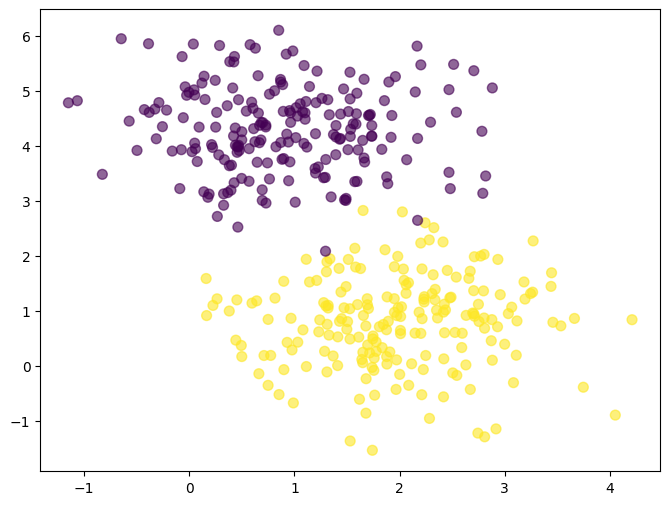

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.6)
plt.show()

## Cost (Loss) function [Cross Entropy function]

The formula gives the cost function for the logistic regression:
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{i}\ln(h_{\theta}(x^{i}))+(1-y^{i})\ln(1-h_{\theta}(x^{i}))]
$$

Where hypothesis $h_{\theta}$ is the sigmoid function.

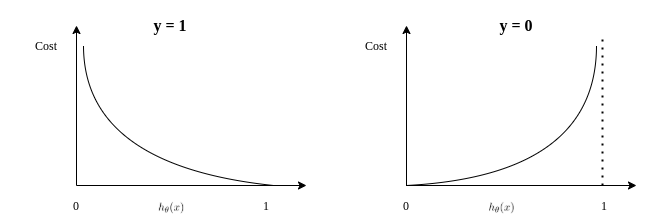

Cross Entropy Logistic Regression Cost (Loss) Function demonstration

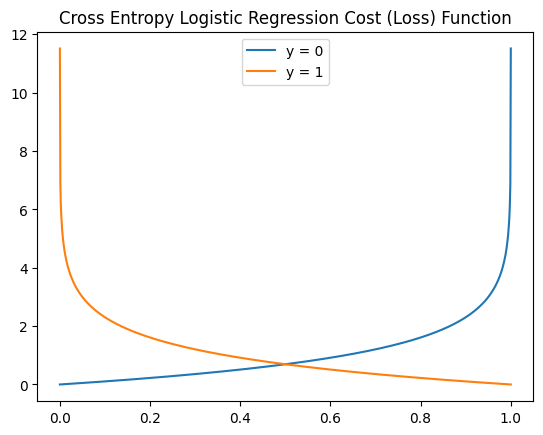

In [ ]:
# Logistic Regression Cost (Loss) Function
def cost(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

n = 1000
hh = np.linspace(1e-5, 0.99999, n)
yy_0 = np.zeros(n)
yy_1 = np.ones(n)
cc0 = []
cc1 = []
cc_sum=[]
for i in range(n):
  ll0 = cost(hh[i], yy_0[i])
  ll1 = cost(hh[i], yy_1[i])
  cc0.append(ll0)
  cc1.append(ll1)
  cc_sum.append(ll0+ll1)

plt.plot(hh, cc0, label='y = 0')
plt.plot(hh, cc1, label='y = 1')
plt.title('Cross Entropy Logistic Regression Cost (Loss) Function')
plt.legend()
plt.show()

#plt.plot(hh,cc_sum)
#plt.title('Final Cross Entropy sum')
#plt.show()


## Gradient Descent
Gradient descent is an optimization algorithm that is responsible for the learning of best-fitting parameters. By differentiating the cost function, we get the gradient descent expression:

$$\frac{\partial J(\theta )}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

The vectorised form of the gradient descent expression, which we will be using in our code is:

$$∇J(\theta)=X^T (h_{\theta}(x) - y) $$

## Minimizing the Cost with Gradient Descent

Assume we have a total of $n$ features. In this case, we have $n$ parameters for the $\theta$ vector. To minimize our cost function, we need to run the gradient descent on each parameter $\theta_j$:

$$\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta), $$

where $\alpha$ is the learning rate and $\theta$ are here represented by the Weight vector ($w$).


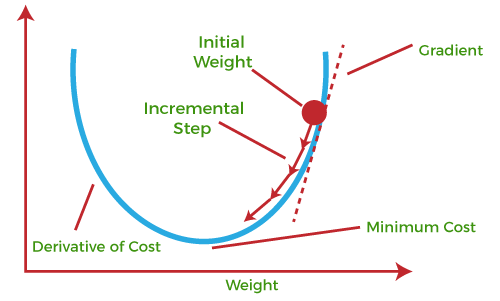

## Define functions

Next we will define sigmoid function, loss function and gradient descent

In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
def addOnes(X):
   intercept = np.ones((X.shape[0], 1))
   return np.concatenate((intercept, X), axis=1)

# outra maneira de adicionar uma coluna de '1' correspondente ao weight(0)
def addOnes_(X):
    return np.c_[np.ones(X.shape[0]),X]

# função logística (sigmoid)
def sigmoid(z):
   return 1 / (1 + np.exp(-z))

# função perda (loss), também chamda de função custo (cost) ou função erro (error)
# log-likelihood function (LLF) --> maximum likelihood estimation
def loss(h, y):
   return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

# treinamento do modelo
def fit(X, y, eta, num_iter):
    # initialize the weights with zeros
    w = np.zeros(X.shape[1])
    # initialize cost vector with empty list
    cost_ = []

    for i in range(num_iter):
        # multiplicação da matriz X pelo vetor peso (w)
        z = np.dot(X, w)
        # função logística (sigmoid) --> 0 < h < 1
        h = sigmoid(z)
        # função custo (perda)
        loss_ = loss(h, y)
        # salvo valor da função custo
        cost_.append(loss_)
        # derivada da função custo --> gradiente(custo) --> Função Gradiente Descendente
        gradient = np.dot(X.T, (h - y)) / y.size
        # atualização dos pesos (gradiente descendente) ==> w = w - eta * gradiente
        w -= eta * gradient

        if(i % 100 == 0):
            print(f'loss[{i}]: {loss_}')
            #cost_.append(loss_)

    return cost_, w

# predict the output probabilities
def predict_prob(X, w):
   return sigmoid(np.dot(X, w))

def prediction(X, w):
   return predict_prob(X, w).round()

# medição da acurácia das predições
def Accuracy(y, y_hat):
    match = 0
    n = y.shape[0]
    for i in range(n):
        if(y[i] == y_hat[i]):
            match += 1

    accuracy = match / n
    return accuracy

In [ ]:
# adiciona uma coluna de '1' correspondente ao weight(0)
X_ones = addOnes_(X)
# learning rate --> hyperparameter
eta = 0.01
# number of iterations (epochs)
n_epochs = 300
# Fit net --> retorna a função custo em forma de vetor e o vetor peso final otimizado
fCusto, w = fit(X_ones, y, eta, n_epochs)

loss[0]: 0.6931471805599452
loss[100]: 0.38935812410239007
loss[200]: 0.29322992381066426


In [ ]:
print('Valor final da Função Custo (Perda): ', fCusto[-1])

Valor final da Função Custo (Perda):  0.24248237253976782


In [ ]:
# o objetivo é encontrar os pesos otimizados (weights) das entradas através do treinamento do modelo
print('Os pesos do modelo treinado:', w)

Os pesos do modelo treinado: [ 0.26161312  0.71685032 -0.70830365]


In [ ]:
# Compute the prediction output value y (y_hat)
# Utilizando os pesos do modelo treinado vamos fazer as predições (y_hat = ŷ)
y_hat = prediction(X_ones, w)
#print('Matrix y: \n', y)
#print('Matrix prediction y_hat: \n', y_hat.astype('int'))

In [ ]:
# imprimindo a quantidade dos erros de predição
print('Mismatch prediction: ', (y!=y_hat).sum())

Mismatch prediction:  19


In [ ]:
# Acurácia --> métrica de eficiência do algoritmo
acc = Accuracy(y, y_hat)
#print('Acurácia: ', acc)
print("Accuracy: {:.1f}%".format(acc * 100))
accuracy = (y_hat == y).mean()
print("Accuracy (another way): {:.1f}%".format(accuracy * 100))

Accuracy: 95.2%
Accuracy (another way): 95.2%


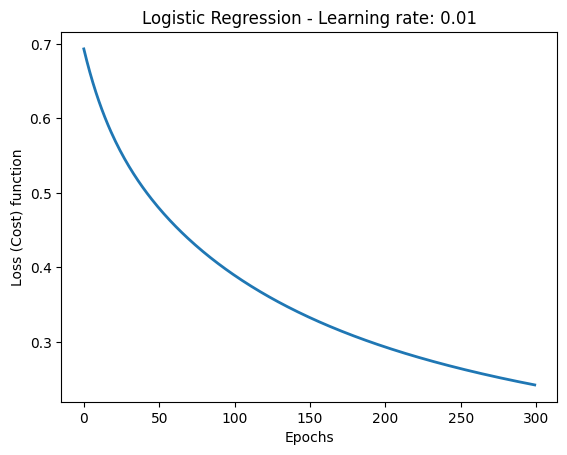

In [ ]:
#plt.plot(range(1, len(fCusto) + 1), fCusto, marker='.')
#plt.plot(range(1, len(fCusto) + 1), fCusto, linewidth=2)
plt.plot(fCusto, linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost) function')
plt.title('Logistic Regression - Learning rate: ' + str(eta))
plt.show()

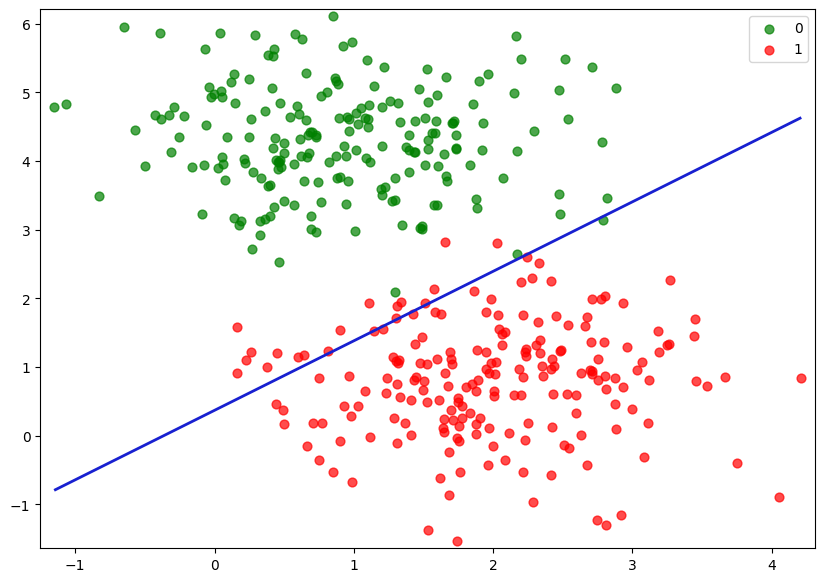

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0', alpha=.7, s=40)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1', alpha=.7, s=40)
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
# adiciona uma coluna de '1' correspondente ao weight(0)
grid_ones = addOnes_(grid)
# grid_ones = np.c_[np.ones(grid.shape[0]),grid]

# predict the output probabilities with sigmoid function
probs = predict_prob(grid_ones, w).reshape(xx1.shape)
# plota a margem limítrofe de classificação
plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors='#1820d0')
plt.xlim(x1_min - .1, x1_max + .1)
plt.ylim(x2_min - .1, x2_max + .1)
plt.show()


# Exercícios

1. Modificar os hiperparêmtros de treinamento do modelo `learning rate (eta)` para 1, 0.1, 0.01, 0.001, 0.0001 e adequar o nr. de iterações (`epochs`) para cada `eta` e comentar os resultados.
2. Projete e teste um `fator de interrupção` no loop de iterações de treinamento de forma que o sistema saia do treinamento de forma autmática quando esse fator for menor que um ceto valor determinado.
3. Mudar os parâmetros de configuração do dataset: `n_samples`, `cluster_std` e `random_state`, um de cada vez, aumentando e diminuindo valores. Comentar os resultados.  
4. Utilize a função custo *Mean Squared Error* (**MSE**) no lugar da função custo *Cross Entropy function* e comprare o rendimento do algoritmo.
5. Crie um vetor **acurácia** dentro do loop de iterações e ao final, plote o gráfico da acurácia X épocas, demostrando o crescimento da acurácia do sistema ao longo das iterações.
6. Aumente o banco de dados para 600 amostras e separe 30% para testes. Depois de treinado utlize o banco de testes para verificar se a acurácia se mantém.
1. Utilize a função `sklearn.datasets.make_classification` para gerar um banco de dados com 800 amostras, 5 features (colunas) e 2 classes (target). Separe o banco de dados com 70% para testes. Treine e sintonize os hiperparêmtros do algoritmo Logistic Regression para obter a melhor acurária possível.

# Referências

[1] https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

[2] http://neuralnetworksanddeeplearning.com/chap3.html

[3] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

[4] https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

[5] https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67

# Contribuições dos Alunos

1. Contribuição de Ivan Rossato Chrun (<ivan.rossato.chrun@uel.br>)

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br>

def rodar_(x_in,y_in, eta_in, n_epochs_in):

  X_ones = addOnes_(x_in)
  y_in = y
  eta = eta_in
  n_epochs = n_epochs_in

  fCusto, w = fit(X_ones, y, eta, n_epochs)

  print('Valor final da Função Custo (Perda): ', fCusto[-1])

  # o objetivo é encontrar os pesos otimizados (weights) das entradas pelo treinamento da rede
  print('Os pesos da rede treinada:', w)

  # Compute the prediction output value y (y_hat)
  y_hat = prediction(X_ones, w)
  #print('Matrix y: \n', y)
  #print('Matrix prediction y_hat: \n', y_hat.astype('int'))

  print('Mismatch prediction: ', (y!=y_hat).sum())

  # Acurácia
  acc = Accuracy(y, y_hat)
  #print('Acurácia: ', acc)
  print("Accuracy: {:.1f}%".format(acc * 100))
  accuracy = (y_hat == y).mean()
  print("Accuracy (another way): {:.1f}%".format(accuracy * 100))

  return fCusto, w,  [eta_in, n_epochs_in, (y!=y_hat).sum(), acc]

#x_in -> X
#y_in -> Y
#eta_in -> eta
#n_epochs_in

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

eta_in = [1, 0.1, 0.01, 0.001, 0.0001]
n_epochs = [1000, 1000, 1000, 1000, 1000]
color = ['blue','orange','green','red','purple']

print(eta_in[0])
for i in range(0,len(eta_in)):
  print('\n-------------------------------------------------')
  print(f'Eta = {eta_in[i]}, epocas = {n_epochs[i]}\n')
  exec(f'fcusto{i}, w{i}, lista{i} = rodar_(X,y, eta_in[{i}], n_epochs[{i}])')

1

-------------------------------------------------
Eta = 1, epocas = 1000

loss[0]: 0.6931471805599452
loss[100]: 0.05732820086360533
loss[200]: 0.04441270966548437
loss[300]: 0.03803079868466355
loss[400]: 0.03415670874150456
loss[500]: 0.03155499442852887
loss[600]: 0.029690347130302025
loss[700]: 0.028290667014195386
loss[800]: 0.027202926866491804
loss[900]: 0.026334535068670048
Valor final da Função Custo (Perda):  0.025632651330426418
Os pesos da rede treinada: [ 6.76185729  2.21121065 -4.10415705]
Mismatch prediction:  5
Accuracy: 98.8%
Accuracy (another way): 98.8%

-------------------------------------------------
Eta = 0.1, epocas = 1000

loss[0]: 0.6931471805599452
loss[100]: 0.13578038119613556
loss[200]: 0.10190355222429252
loss[300]: 0.0875702876854953
loss[400]: 0.07905495596471501
loss[500]: 0.07315408824153959
loss[600]: 0.0686926272165831
loss[700]: 0.0651281991059295
loss[800]: 0.06217183944388203
loss[900]: 0.05965349320940926
Valor final da Função Custo (Perda): 

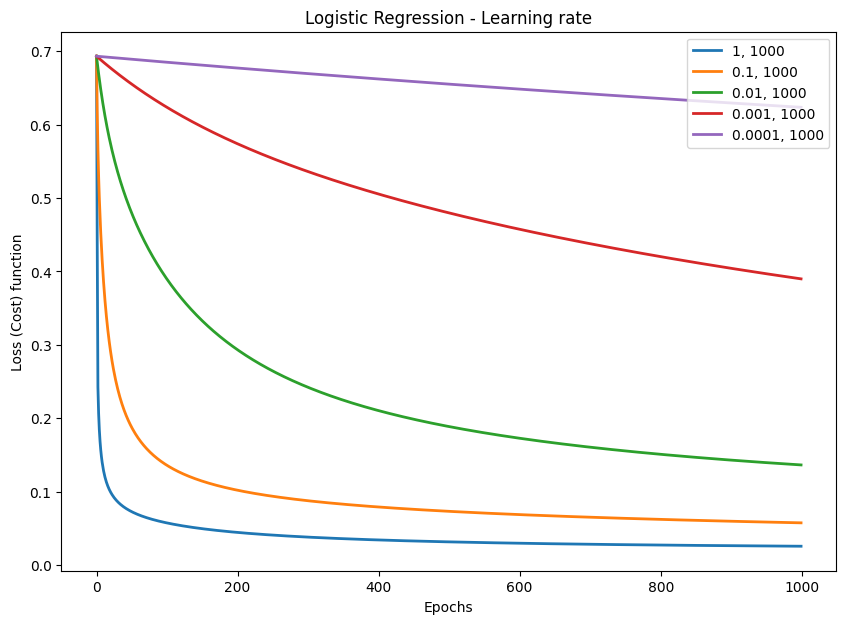

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br>

plt.figure(figsize=(10, 7))

for i in range(0,len(eta_in)):
  exec(f'eta_t = lista{i}[0]')
  exec(f'n_epochs_t = lista{i}[1]')
  exec(f"""plt.plot(fcusto{i}, linewidth=2,label='{eta_t}, {n_epochs_t}')""")

  #plt.title('Logistic Regression - Learning rate: ' + str(eta))

plt.title('Logistic Regression - Learning rate')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost) function')
plt.show()

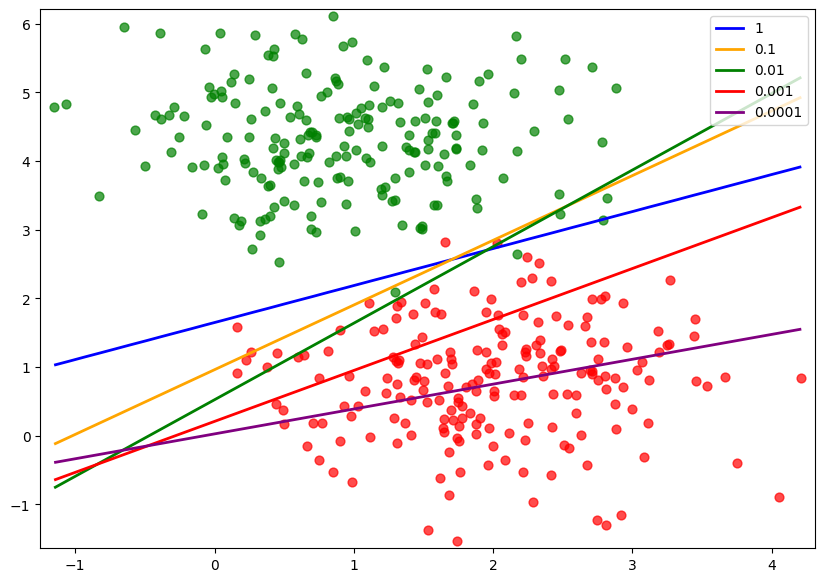

In [ ]:
# Contribuição de Ivan Rossato Chrun <ivan.rossato.chrun@uel.br>

plt.figure(figsize=(10, 7))
#plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0', alpha=.7, s=40)
#plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1', alpha=.7, s=40)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', alpha=.7, s=40, label='Grupo 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', alpha=.7, s=40, label='Grupo 2')

x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
# adiciona uma coluna de '1' correspondente ao weight(0)
grid_ones = addOnes_(grid)
# grid_ones = np.c_[np.ones(grid.shape[0]),grid]

for i in range(0,len(eta_in)):
  exec(f"""probs = predict_prob(grid_ones, w{i}).reshape(xx1.shape)""")
  #plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors='#1820d0')
  plt.contour(xx1, xx2, probs, [.5], linewidths=2, colors=color[i])

legend_elements = [Line2D([0], [0], color=color[0], lw=2, label=lista0[0]),
                   Line2D([0], [0], color=color[1], lw=2, label=lista1[0]),
                   Line2D([0], [0], color=color[2], lw=2, label=lista2[0]),
                   Line2D([0], [0], color=color[3], lw=2, label=lista3[0]),
                   Line2D([0], [0], color=color[4], lw=2, label=lista4[0])]

plt.legend(handles=legend_elements)
plt.xlim(x1_min - .1, x1_max + .1)
plt.ylim(x2_min - .1, x2_max + .1)
plt.show()

2. Marcelo Henrique Jeronymo (<marcelo.henrique@uel.br>)

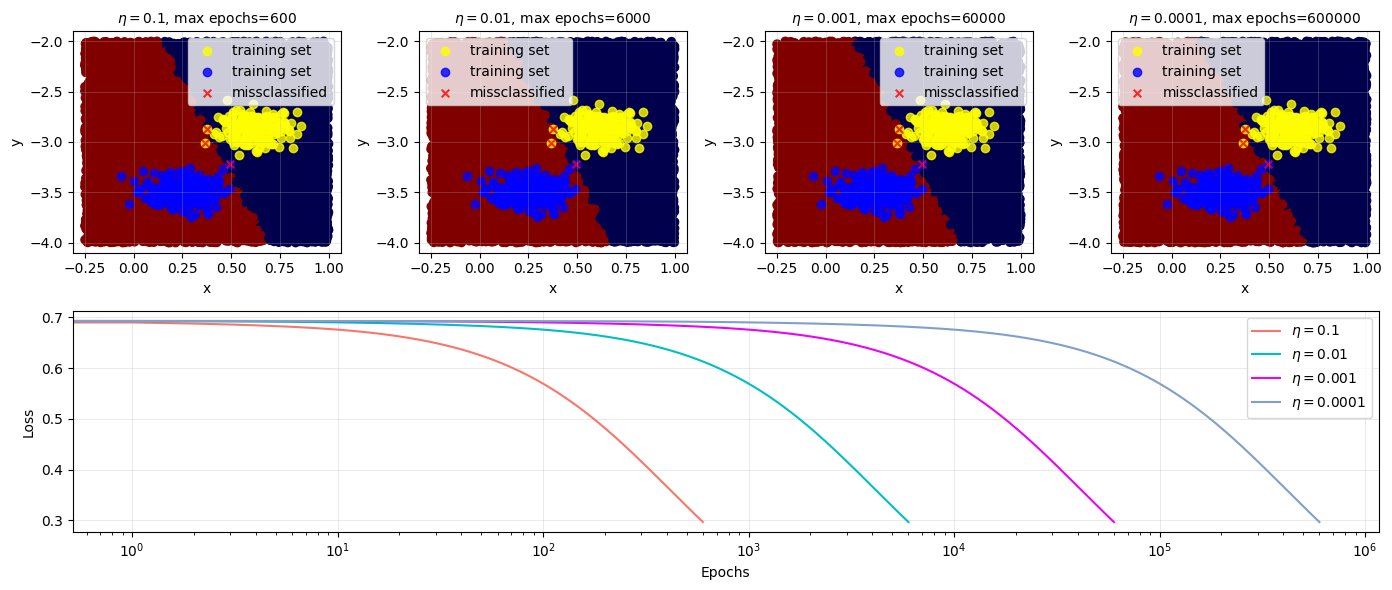

In [ ]:
# Contribuição de Marcelo Henrique Jeronymo <marcelo.henrique@uel.br>

from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

def add_bias(X):
  return np.hstack((X, np.ones((X.shape[0], 1))))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss(h, y):
  return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def fit(X, y, max_iter=100, eta=1e-3, min_loss=1e-2):

    X = add_bias(X)
    weights = np.zeros(shape=(X.shape[1]))

    cost = []

    for i in range(max_iter):

        z = X.dot(weights)
        h = sigmoid(z)

        loss_ = loss(h, y)
        cost.append(loss_)

        grad = X.T.dot(h - y) / y.size
        weights -= eta * grad

        if loss_ < min_loss: break


    def prediction_f(x):
      return sigmoid(x.dot(weights[:-1]) + weights[-1]).round()

    return cost, weights, prediction_f

x, y = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=0.1, random_state=69420)

fig, ax = plt.subplot_mosaic([[0, 1, 2, 3],
                              ["cost", "cost", "cost", "cost"]], figsize=(14, 6), tight_layout=True)

cost_list = []
l_rates = [10**-i for i in range(1, 5)]
m_iters = (600, 6000, 60000, 600000)
for i, (lr, max_epochs) in enumerate(zip(l_rates, m_iters)):

    cost_, _, prediction = fit(x, y, max_iter=max_epochs, eta=lr, min_loss=-1)
    cost_list.append(cost_)

    y_pred = prediction(x)

    xx_plot = np.random.uniform(-0.25, 1, size=(10000, 1))
    xy_plot = np.random.uniform(-4, -2, size=(10000, 1))
    x_plot = np.hstack((xx_plot, xy_plot))

    y_plot = prediction(x_plot)

    ax[i].scatter(*x_plot.T, c=y_plot, cmap="seismic")

    ax[i].scatter(*x[y==0].T, color="yellow", alpha=0.8, label="training set")
    ax[i].scatter(*x[y==1].T, color="blue", alpha=0.8, label="training set")
    ax[i].scatter(*x[y!=y_pred].T, marker='x', color="red", s=30, alpha=0.8, label="missclassified")

    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(f"$\eta={lr}$, max epochs={max_epochs}", fontsize=10)
    ax[i].grid(lw=0.4, alpha=0.5)
    ax[i].legend()

colors = ["#F8766D", "#00BFC4", "#E606F4", "#80A0CC", "#8B0000"]
for i, (cost, lr) in enumerate(zip(cost_list, l_rates)):
    ax["cost"].semilogx(cost, color=colors[i], label=f"$\eta={lr}$")
ax["cost"].set_xlabel("Epochs")
ax["cost"].set_ylabel("Loss")
ax["cost"].grid(lw=0.4, alpha=0.5)
ax["cost"].legend()

plt.show()